<a href="https://colab.research.google.com/github/shonyeajin/KCBD/blob/main/%EA%B0%84%EB%8B%A8%ED%95%9C_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [3]:
timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps, input_features))

state_t=np.zeros((output_features, ))

In [6]:
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,))

In [9]:
successive_outputs=[]
for input_t in inputs:
  output_t=np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
  successive_outputs.append(output_t)
  state_t=output_t

final_output_sequence=np.stack(successive_outputs,axis=0)

위에서 구현한 것이 실제로 SimpleRNN에 해당한다

In [11]:
from keras.layers import SimpleRNN

마지막 타임스텝의 output만 출력하는 예시

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model=Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


전체 타임스텝의 output을 출력하는 예시

In [17]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [18]:
model= Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB 데이터에 적용해보기

In [19]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('데이터 로딩...')
(input_train, y_train),(input_test, y_test)= imdb.load_data(num_words=max_features)
print(len(input_train),'훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

데이터 로딩...
17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스


In [20]:
print('시퀀스 패딩 (samles X time)')
input_train=sequence.pad_sequences(input_train, maxlen=maxlen)
input_test=sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:',input_train.shape)
print('input_test 크기:',input_test.shape)

시퀀스 패딩 (samles X time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [23]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(input_train, y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 26s 156ms/step - loss: 0.6226 - acc: 0.6338 - val_loss: 0.4476 - val_acc: 0.7998
Epoch 2/10
157/157 [==============================] - 24s 153ms/step - loss: 0.3815 - acc: 0.8396 - val_loss: 0.3616 - val_acc: 0.8520
Epoch 3/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2788 - acc: 0.8903 - val_loss: 0.4239 - val_acc: 0.8086
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2346 - acc: 0.9115 - val_loss: 0.3438 - val_acc: 0.8584
Epoch 5/10
157/157 [==============================] - 24s 154ms/step - loss: 0.1716 - acc: 0.9357 - val_loss: 0.3548 - val_acc: 0.8682
Epoch 6/10
157/157 [==============================] - 24s 155ms/step - loss: 0.1259 - acc: 0.9566 - val_loss: 0.4143 - val_acc: 0.8422
Epoch 7/10
157/157 [==============================] - 24s 152ms/step - loss: 0.0860 - acc: 0.9713 - val_loss: 0.5198 - val_acc: 0.7924
Epoch 8/10
157/157 [==============================] - 2

In [24]:
import matplotlib.pyplot as plt

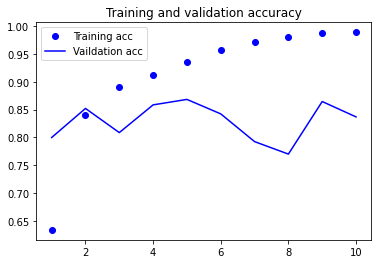

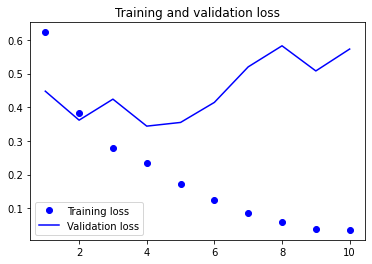

In [26]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Vaildation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss' )
plt.title('Training and validation loss')
plt.legend()

plt.show()